In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [45]:
def time_energy_to_heat(T, H_del, U, k):
    num = np.log(1-(H_del*k)/U*(1-np.exp(-k*T)))
    denom = -k
    return num/denom, U*num/denom/T


/var/folders/fq/9t66hqz51y5ddnygddgjtsmc0000gn/T/ipykernel_75815/4073281011.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return num/denom, U*num/denom/T
/var/folders/fq/9t66hqz51y5ddnygddgjtsmc0000gn/T/ipykernel_75815/4073281011.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  num = np.log(1-(H_del*k)/U*(1-np.exp(-k*T)))
/var/folders/fq/9t66hqz51y5ddnygddgjtsmc0000gn/T/ipykernel_75815/4073281011.py:2: RuntimeWarning: invalid value encountered in log
  num = np.log(1-(H_del*k)/U*(1-np.exp(-k*T)))


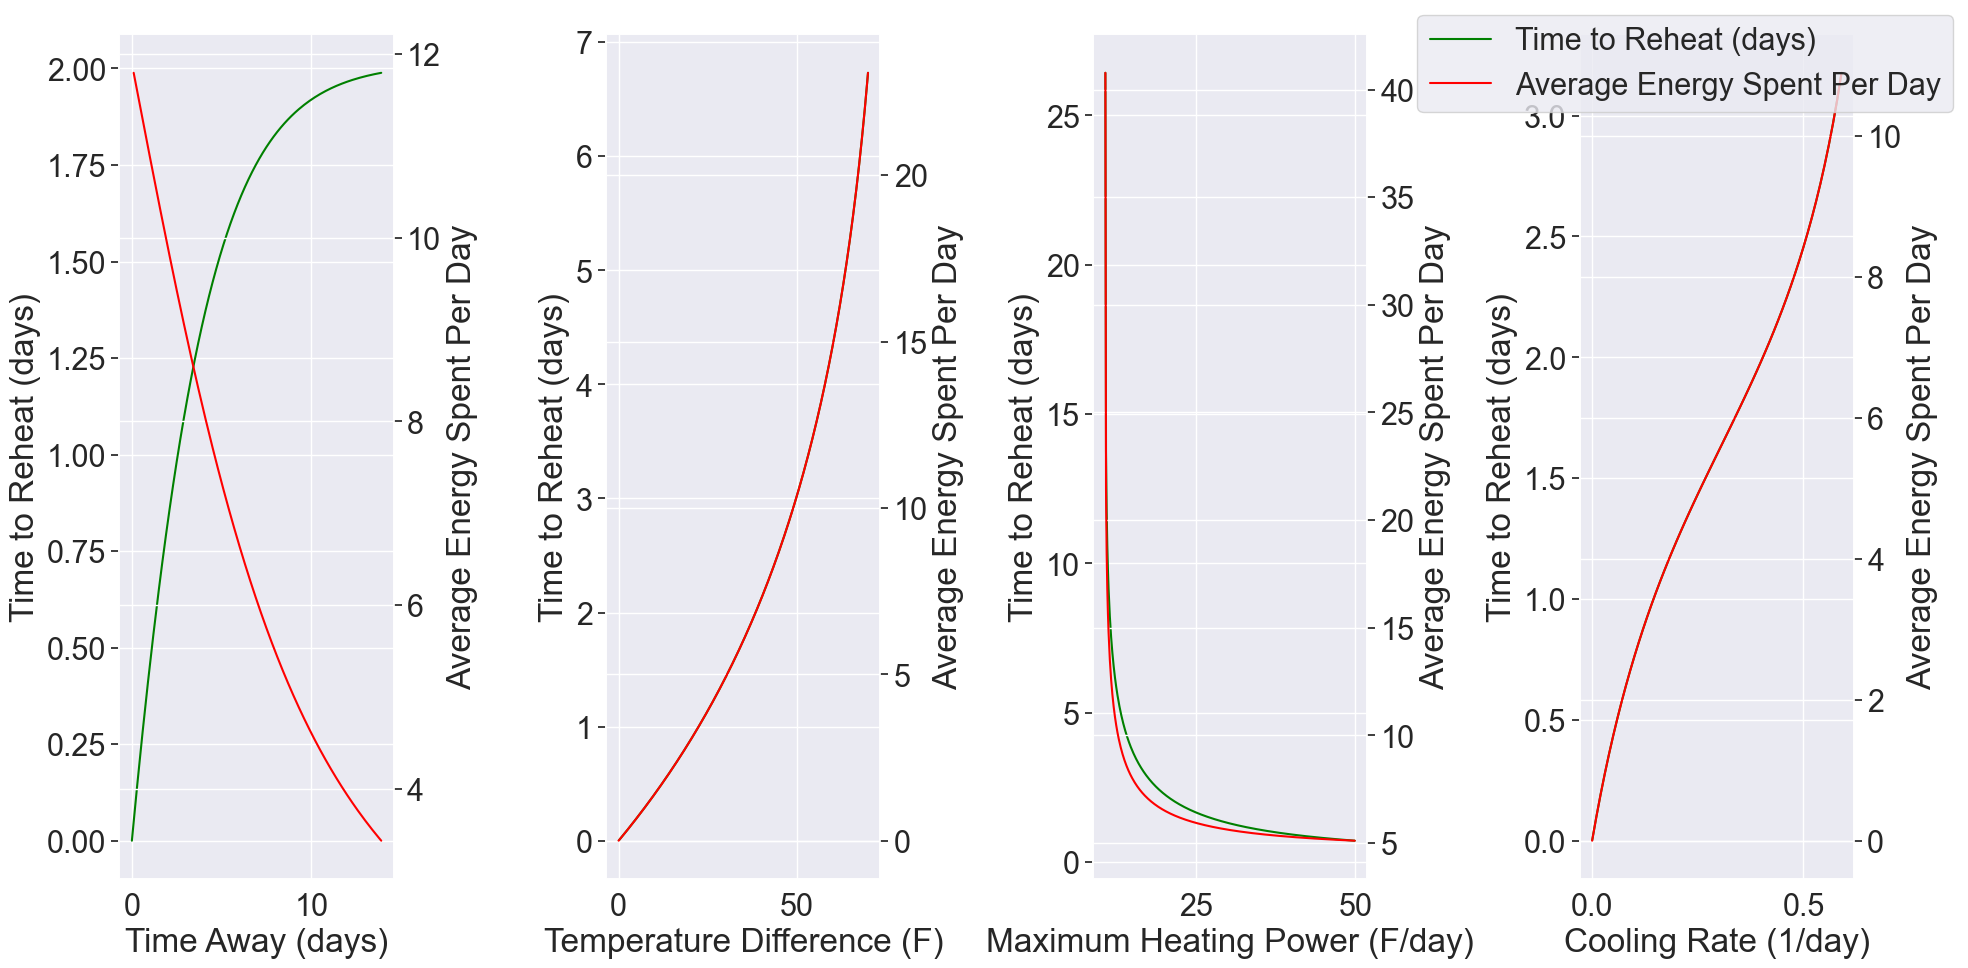

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,10))
sns.set(font_scale=2)

T = 7
Ts = np.arange(0,14, 0.1)
H_del = 35 # outdoor temp 30, goal temp 65
H_dels = np.arange(0, 70, 0.1)
U = 24 # U/k is around 70 for max temp of 30+70=100
Us = np.arange(0, 50, 0.1)
k = 0.34 #temperature difference cuts in half every 3 days
ks = np.arange(0, 0.6, 0.01)

# Ts
ts = []
es = []
for T_p in Ts:
    t, e = time_energy_to_heat(T_p, H_del, U, k)

    ts.append(t)
    es.append(e)

data = {"Time Away (days)": Ts, "Time to Reheat (days)": ts, "Average Energy Spent Per Day": es}
df = pd.DataFrame(data=data)

sns.lineplot(data=df, x="Time Away (days)", y="Time to Reheat (days)", ax=axs[0], c="green", label="Time to Reheat (days)", legend=False)
ax = axs[0].twinx()
sns.lineplot(data=df, x="Time Away (days)", y="Average Energy Spent Per Day", ax=ax, c="red", label="Average Energy Spent Per Day", legend=False)
ax.figure.legend()

# H_dels
ts = []
es = []
for H_del_p in H_dels:
    t, e = time_energy_to_heat(T, H_del_p, U, k)

    ts.append(t)
    es.append(e)

data = {"Temperature Difference (F)": H_dels, "Time to Reheat (days)": ts, "Average Energy Spent Per Day": es}
df = pd.DataFrame(data=data)

sns.lineplot(data=df, x="Temperature Difference (F)", y="Time to Reheat (days)", ax=axs[1], c="green")
ax = axs[1].twinx()
sns.lineplot(data=df, x="Temperature Difference (F)", y="Average Energy Spent Per Day", ax=ax, c="red")

# Us
ts = []
es = []
for U_p in Us:
    t, e = time_energy_to_heat(T, H_del, U_p, k)

    ts.append(t)
    es.append(e)

data = {"Maximum Heating Power (F/day)": Us, "Time to Reheat (days)": ts, "Average Energy Spent Per Day": es}
df = pd.DataFrame(data=data)

sns.lineplot(data=df, x="Maximum Heating Power (F/day)", y="Time to Reheat (days)", ax=axs[2], c="green")
ax = axs[2].twinx()
sns.lineplot(data=df, x="Maximum Heating Power (F/day)", y="Average Energy Spent Per Day", ax=ax, c="red")

# ks
ts = []
es = []
for k_p in ks:
    if k_p > 0:
        t, e = time_energy_to_heat(T, H_del, U, k_p)
    else:
        t = 0
        e = 0

    ts.append(t)
    es.append(e)

data = {"Cooling Rate (1/day)": ks, "Time to Reheat (days)": ts, "Average Energy Spent Per Day": es}
df = pd.DataFrame(data=data)

sns.lineplot(data=df, x="Cooling Rate (1/day)", y="Time to Reheat (days)", ax=axs[3], c="green")
ax = axs[3].twinx()
sns.lineplot(data=df, x="Cooling Rate (1/day)", y="Average Energy Spent Per Day", ax=ax, c="red")

plt.tight_layout()